# Explore Data

Import Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import datetime as dt
from prophet import Prophet
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
from scipy.stats import f_oneway


In [2]:
bh = pd.read_csv(r"C:\Users\HWLEE\Desktop\study\Project data\shopping\shopping_behavior_updated.csv")
bh


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
print(bh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Check any null values in the table

In [4]:
bh.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Check the categorical distributions

In [5]:
# Count of purchases by gender
print(bh['Gender'].value_counts())

# Count of items purchased by category
print(bh['Category'].value_counts())

# Count of shipping types used
print(bh['Shipping Type'].value_counts())

Gender
Male      2652
Female    1248
Name: count, dtype: int64
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64


### Distribution Visualization

C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

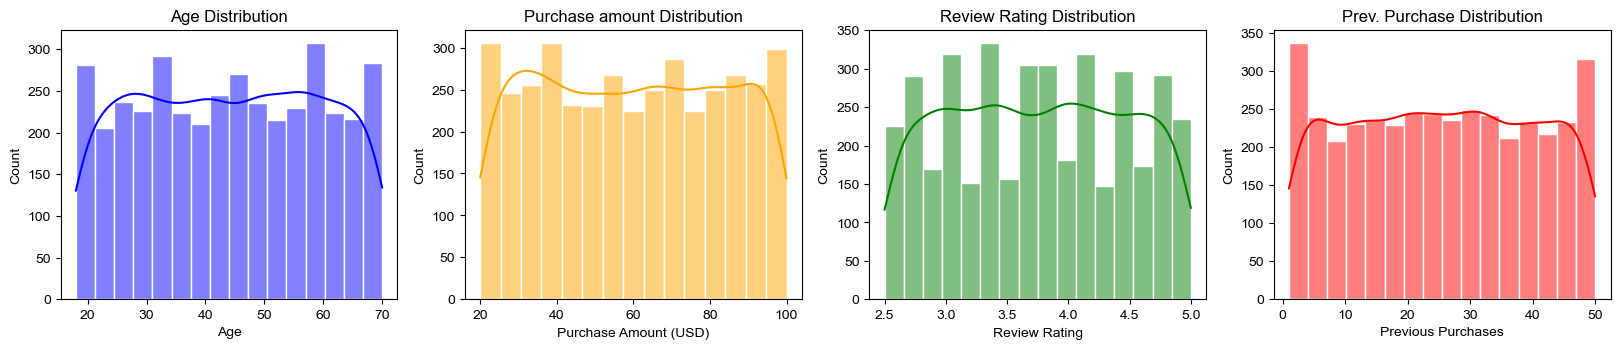

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(20,3.5))
sns.set(style='darkgrid')

sns.histplot(data=bh, x='Age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=bh, x='Purchase Amount (USD)', kde=True, color='orange', ax=axs[1])
sns.histplot(data=bh, x='Review Rating', kde=True, color='green', ax=axs[2])
sns.histplot(data=bh, x='Previous Purchases', kde=True, color='red', ax=axs[3])


axs[0].set_title('Age Distribution')
axs[1].set_title('Purchase amount Distribution')
axs[2].set_title('Review Rating Distribution')
axs[3].set_title('Prev. Purchase Distribution')


plt.show()

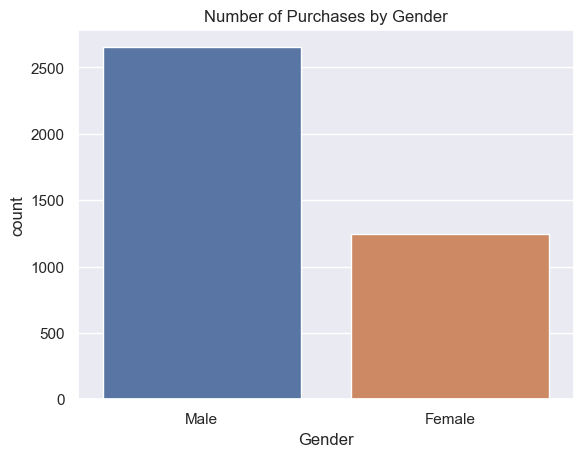

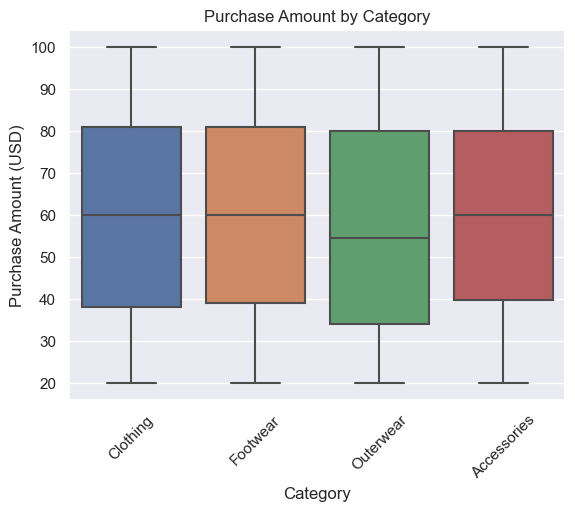

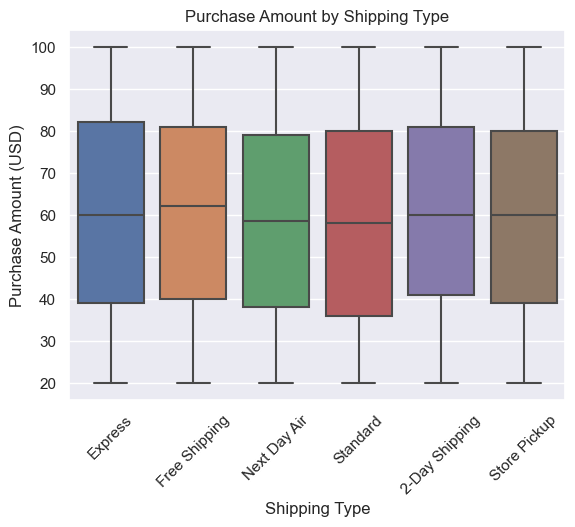

In [7]:
# Bar plot of purchases by gender
sns.countplot(data=bh, x='Gender')
plt.title('Number of Purchases by Gender')
plt.show()

# Boxplot of purchase amount by category
sns.boxplot(data=bh, x='Category', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Category')
plt.xticks(rotation=45)
plt.show()

# Boxplot of purchase amount by shipping
sns.boxplot(data=bh, x='Shipping Type', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Shipping Type')
plt.xticks(rotation=45)
plt.show()



Male has more purchases compared to Females.

In [8]:
# Calculate counts of shipping types for each gender
shipping_by_gender = bh.groupby(['Gender', 'Shipping Type']).size().unstack()

# Convert counts to proportions
shipping_proportions = shipping_by_gender.div(shipping_by_gender.sum(axis=1), axis=0)

# Display the proportions
print(shipping_proportions)

Shipping Type  2-Day Shipping   Express  Free Shipping  Next Day Air  \
Gender                                                                 
Female               0.165865  0.155449       0.199519      0.153045   
Male                 0.158371  0.170437       0.160633      0.172323   

Shipping Type  Standard  Store Pickup  
Gender                                 
Female         0.170673      0.155449  
Male           0.166290      0.171946  


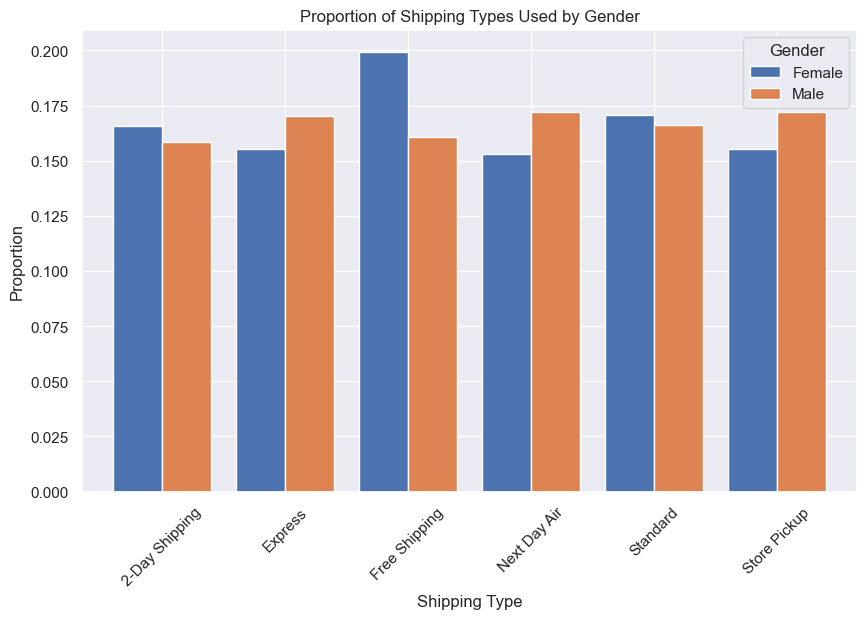

In [9]:
# Calculate the proportions of shipping types by gender
shipping_by_gender = bh.groupby(['Gender', 'Shipping Type']).size().reset_index(name='Count')
gender_totals = bh['Gender'].value_counts()

# Add proportion column
shipping_by_gender['Proportion'] = shipping_by_gender.apply(
    lambda row: row['Count'] / gender_totals[row['Gender']], axis=1
)

# Pivot for visualization
shipping_pivot = shipping_by_gender.pivot(index='Shipping Type', columns='Gender', values='Proportion')

# Visualize as a bar plot
shipping_pivot.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Proportion of Shipping Types Used by Gender')
plt.xlabel('Shipping Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Females tend to prefer "Free Shipping," while males show a preference for faster shipping options like "Store Pickup," "Next Day Air," and "Express."

C:\Users\HWLEE\AppData\Local\Temp\ipykernel_28056\3352235714.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bh.groupby(['Gender', 'Age Group', 'Shipping Type'])
C:\Users\HWLEE\AppData\Local\Temp\ipykernel_28056\3352235714.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shipping_by_gender_age.groupby(['Gender', 'Age Group'])['Count']
C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

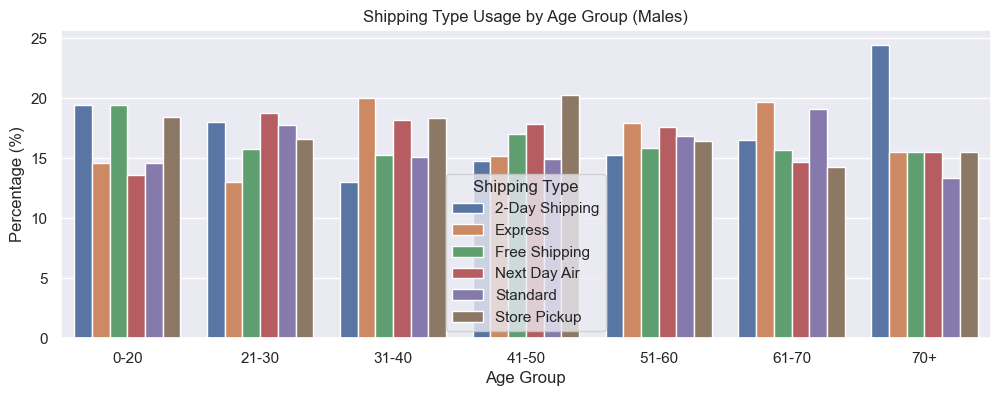

C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


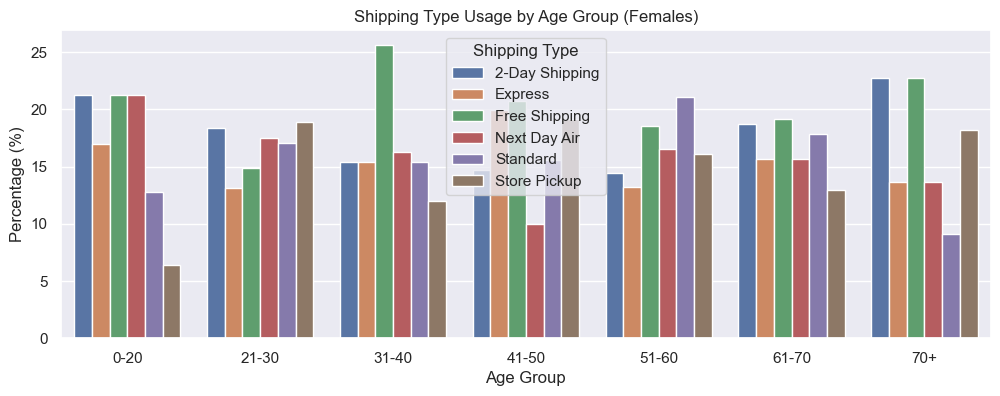

In [15]:
# Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']

# Create Age Group column
bh['Age Group'] = pd.cut(bh['Age'], bins=age_bins, labels=age_labels, right=False)

# Group data by Gender, Age Group, and Shipping Type
shipping_by_gender_age = (
    bh.groupby(['Gender', 'Age Group', 'Shipping Type'])
    .size()
    .reset_index(name='Count')
)

# Calculate the percentage within each Gender and Age Group
shipping_by_gender_age['Percentage'] = (
    shipping_by_gender_age.groupby(['Gender', 'Age Group'])['Count']
    .transform(lambda x: (x / x.sum()) * 100)
)

# Filter data for males
male_shipping_data = shipping_by_gender_age[shipping_by_gender_age['Gender'] == 'Male']

# Filter data for females
female_shipping_data = shipping_by_gender_age[shipping_by_gender_age['Gender'] == 'Female']

# Plot for males
plt.figure(figsize=(12, 4))
sns.barplot(
    data=male_shipping_data,
    x='Age Group',
    y='Percentage',
    hue='Shipping Type'
)
plt.title('Shipping Type Usage by Age Group (Males)')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')
plt.legend(title='Shipping Type')
plt.show()

# Plot for females
plt.figure(figsize=(12, 4))
sns.barplot(
    data=female_shipping_data,
    x='Age Group',
    y='Percentage',
    hue='Shipping Type'
)
plt.title('Shipping Type Usage by Age Group (Females)')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')
plt.legend(title='Shipping Type')
plt.show()

Males aged 70+ predominantly use "Free Shipping," whereas females in the same age group favor both "2-Day Shipping" and "Free Shipping."\
Females aged 31-40 significantly prefer "Free Shipping," while males in this age group tend to opt for faster shipping methods.

In [16]:
# Top 10 locations with the highest total purchase amounts
print(bh.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10))



Location
Montana          5784
Illinois         5617
California       5605
Idaho            5587
Nevada           5514
Alabama          5261
New York         5257
North Dakota     5220
West Virginia    5174
Nebraska         5172
Name: Purchase Amount (USD), dtype: int64


### Correlation between columns

Make dummy columns

In [17]:
bhn = pd.get_dummies(bh, columns=['Gender','Promo Code Used','Subscription Status'], drop_first=False)

bh_n = bhn.select_dtypes(include=[float, int, bool]) 
bh_n

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Female,Gender_Male,Promo Code Used_No,Promo Code Used_Yes,Subscription Status_No,Subscription Status_Yes
0,1,55,53,3.1,14,False,True,False,True,False,True
1,2,19,64,3.1,2,False,True,False,True,False,True
2,3,50,73,3.1,23,False,True,False,True,False,True
3,4,21,90,3.5,49,False,True,False,True,False,True
4,5,45,49,2.7,31,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,28,4.2,32,True,False,True,False,True,False
3896,3897,52,49,4.5,41,True,False,True,False,True,False
3897,3898,46,33,2.9,24,True,False,True,False,True,False
3898,3899,44,77,3.8,24,True,False,True,False,True,False


In [18]:
bh_a = bh_n.select_dtypes(include=[float, int, bool]) 


In [19]:
bh_a

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Female,Gender_Male,Promo Code Used_No,Promo Code Used_Yes,Subscription Status_No,Subscription Status_Yes
0,1,55,53,3.1,14,False,True,False,True,False,True
1,2,19,64,3.1,2,False,True,False,True,False,True
2,3,50,73,3.1,23,False,True,False,True,False,True
3,4,21,90,3.5,49,False,True,False,True,False,True
4,5,45,49,2.7,31,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,28,4.2,32,True,False,True,False,True,False
3896,3897,52,49,4.5,41,True,False,True,False,True,False
3897,3898,46,33,2.9,24,True,False,True,False,True,False
3898,3899,44,77,3.8,24,True,False,True,False,True,False


Create Heatmap for correlation

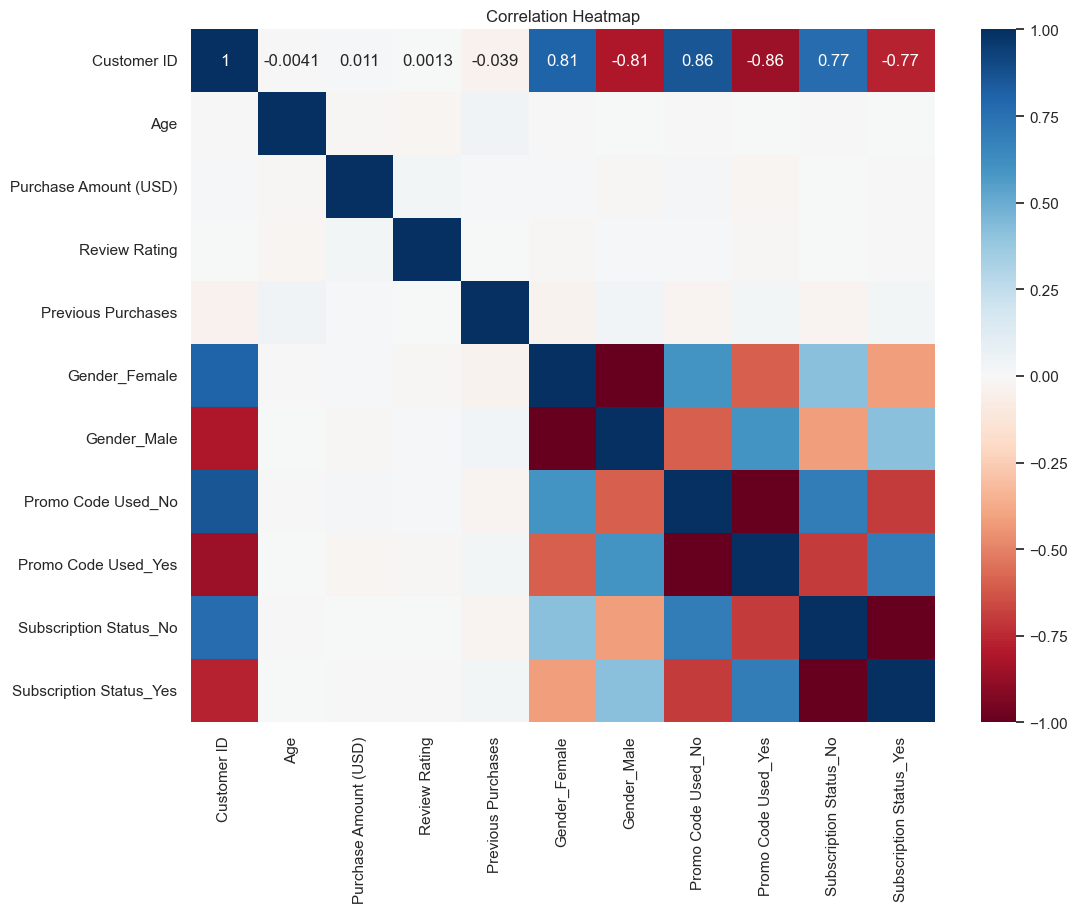

In [20]:
plt.figure(figsize=(12, 9))
sns.heatmap(bh_a.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.yticks(rotation=0)
plt.show()

There appears to be a correlation between Male and Promo Code Used_Yes.